In [244]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Importando Metadados

In [245]:
metadados = pd.read_csv("metadados.csv")

In [246]:
metadados

,img,classes,luz,fundo
0,1,"tesoura, estojo, óculos",1,branco
1,2,"tesoura, estojo, óculos",1,branco
2,3,"tesoura, estojo, óculos",1,branco
3,4,"carteira, controle, maquininha",1,branco
4,5,"carteira, controle, maquininha",1,branco
...,...,...,...,...
139,140,"golfinho, óculos, maquininha",2,preto
140,141,"golfinho, óculos, maquininha",2,preto
141,142,"faca, tesoura, estojo",2,preto
142,143,"faca, tesoura, estojo",2,preto


### Função mostra_classe

A função criada abaixo mostra todas as imagens pertencentes a uma determinada classe em um grid de subplots.

In [247]:
def mostra_classe(classe):
    
    # obtém o index no df metadados correspondente às imagens da classe escolhida
    
    index_classe = metadados[metadados["classes"].str.contains(classe)].index
    n_imagens = index_classe.shape[0]
    
    # define o número de linhas e colunas do grid
    
    n_colunas = 6
    n_linhas = num_linhas = int(n_imagens/6) + (n_imagens/6 > int(n_imagens/6))
    
    # preenche o grid com imagens correspondentes à classe escolhida
    
    plt.figure(figsize = (12, 8))
    
    for i, row in enumerate(index_classe):
        img_n = row + 1
        caminho = f"dados/{img_n:03d}.jpg"

        plt.subplot(n_linhas,n_colunas,i+1)
        with open(caminho, 'rb') as f:
            imagem = plt.imread(f)
        plt.imshow(imagem)
        plt.axis("off")
    
    plt.suptitle(f"Imagens - Classe: {classe}")
    plt.show()
    

A função pode ser usada para visualizar as imagens pertencentes a cada uma das classes individualmente:

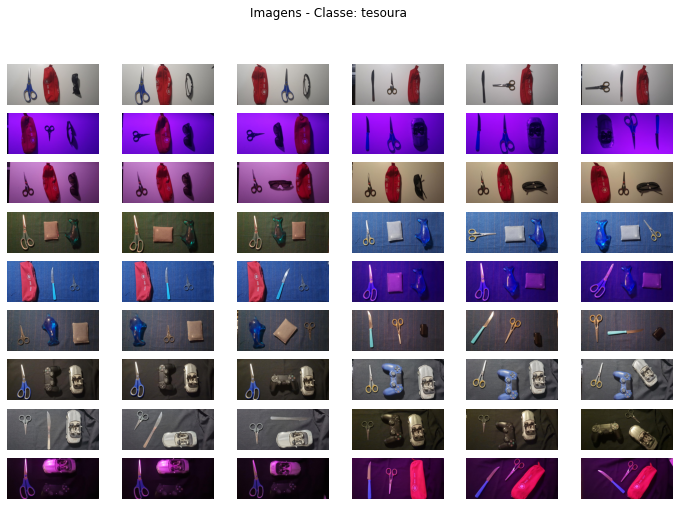

In [248]:
mostra_classe("tesoura")

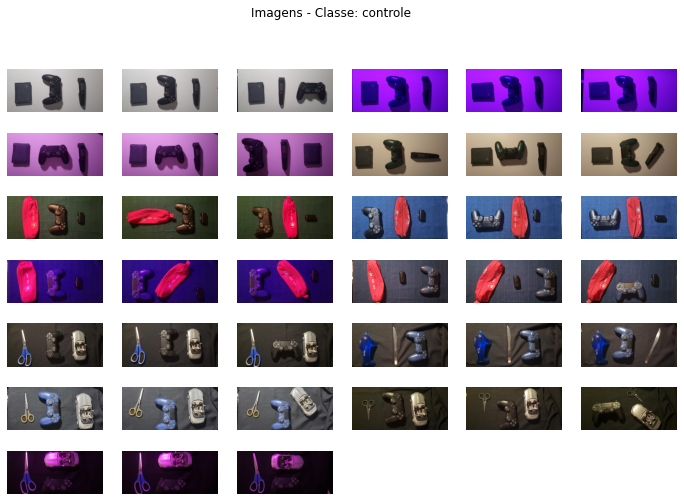

In [249]:
mostra_classe("controle")

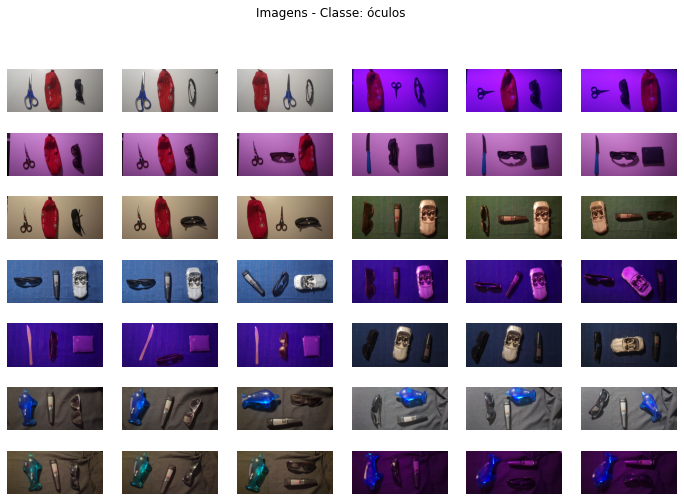

In [250]:
mostra_classe("óculos")

### Tabela Sumária de Dados

Obtendo as classes únicas por meio dos metadados:

In [251]:
objetos_total = []

for i in range(metadados.shape[0]):
    objetos = metadados["classes"][i].split(", ")
    objetos_total += objetos

In [252]:
print(set(objetos_total))

{'fone', 'maquininha', 'estojo', 'óculos', 'controle', 'carteira', ' golfinho', 'faca', 'carro', 'tesoura', 'golfinho'}


In [253]:
classes = list(set(objetos_total))
classes.remove(" golfinho") # um pequeno erro na redação dos metadados
print(classes)

['fone', 'maquininha', 'estojo', 'óculos', 'controle', 'carteira', 'faca', 'carro', 'tesoura', 'golfinho']


Obtendo o tamanho total da base de dados:

In [254]:
tamanho_total = 0

imagens = os.listdir("dados")
for imagem in imagens:
    caminho = os.path.join("dados", imagem)
    tamanho = os.path.getsize(caminho)
    tamanho_total += tamanho

In [255]:
tamanho_total

7634792

Obtendo as dimensões das imagens da base de dados:

In [256]:
caminho = os.path.join("dados", "001.jpg")
with open(caminho, "rb") as f:
    imagem = plt.imread(f)

print(imagem.shape)

(450, 1000, 3)


Imprimindo a Tabela Global Sumária:

In [257]:
tabela = f"""=========================================

Tabela Global Sumária:

- Número de Clases: {len(classes)}
    
- Nome das Classes: {classes}
    
- Número de Imagens: {metadados.shape[0]}

- Tamanho Base de Dados: {tamanho_total/(10**6):.2f} MB

- Dimensões Imagem: {imagem.shape[0]}X{imagem.shape[1]} px
"""

In [258]:
print(tabela)


Tabela Global Sumária:

- Número de Clases: 10
    
- Nome das Classes: ['fone', 'maquininha', 'estojo', 'óculos', 'controle', 'carteira', 'faca', 'carro', 'tesoura', 'golfinho']
    
- Número de Imagens: 144

- Tamanho Base de Dados: 7.63 MB

- Dimensões Imagem: 450X1000 px



***Demais informações estão presentes no README presente no GitHub.***